# 学习Seaborn使用
Author: *Léonore Shaw*
<br>
Time: *2022-7-4 17:39*

1.1、导入Seaborn模块

In [1]:
import seaborn as sns

1.2、查看Seaborn版本

In [2]:
print(sns.__version__)

0.11.2


1.3、查看Seaborn有哪些自带的数据集

In [3]:
print(sns.get_dataset_names()) # ['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


## 2、分类问题：企鹅种类
2.1、载入企鹅数据集

In [5]:
penguins_ds = sns.load_dataset("penguins")
penguins_ds

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


2.2、sns.boxplot：查看数据集中数值的变量范围，是否有异常值

<AxesSubplot:xlabel='bill_length_mm'>

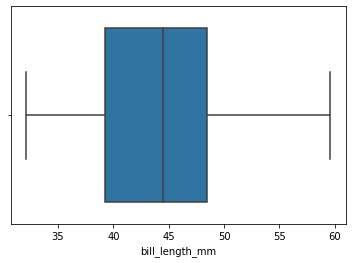

In [7]:
sns.boxplot(data=penguins_ds, x="bill_length_mm")

2.3、sns.displot()查看变量的分布

In [ ]:
sns.displot(data=penguins_ds, x="bill_length_mm")

2.4、sns.displot()绘制两个变量的联合分布

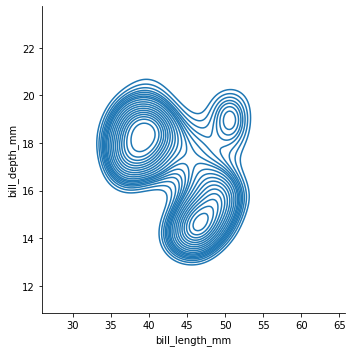

In [30]:
sns.displot(data=penguins_ds, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=0.2, levels=20)

## 3、回归问题：估计餐馆顾客给的小费
3.1、载入小费数据集

In [6]:
tips_ds = sns.load_dataset("tips")
tips_ds

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


3.2、sns.boxplot：查看数据集中数值的变量范围，是否有异常值

<AxesSubplot:xlabel='total_bill'>

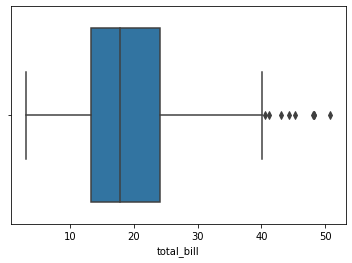

In [8]:
sns.boxplot(data=tips_ds, x="total_bill")

3.3、sns.relplot()：绘制绘制散点图

In [ ]:
sns.relplot(data=tips_ds, markers=["o", "^"], style="time", x="total_bill", y="tip", hue="time")

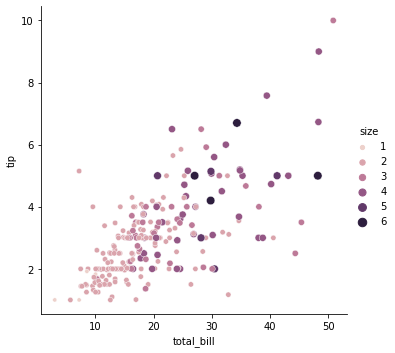

In [21]:
sns.relplot(data=tips_ds,size="size", x="total_bill", y="tip", hue="size")

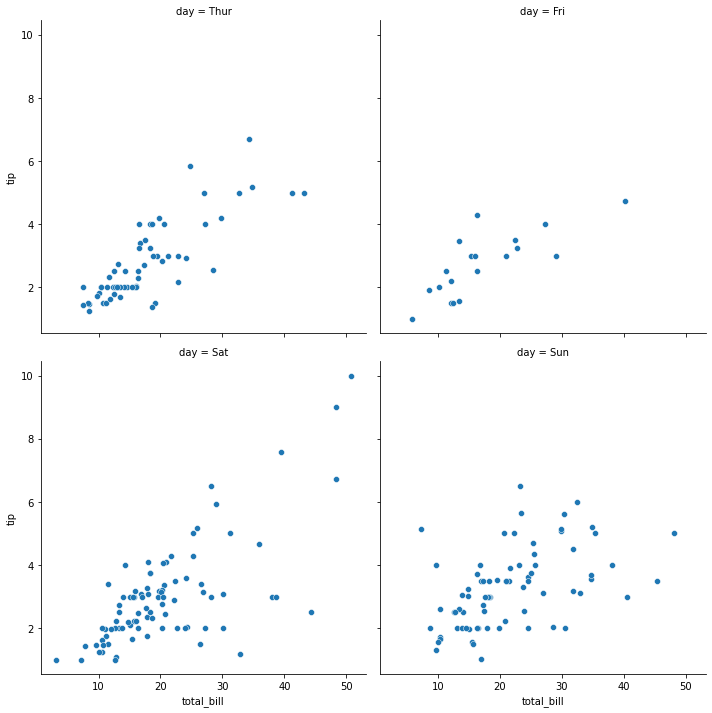

In [22]:
sns.relplot(data=tips_ds, x="total_bill", y="tip", col="day", col_wrap=2)

3.4、sns.lmplot()：两个数值变量的线性相关性

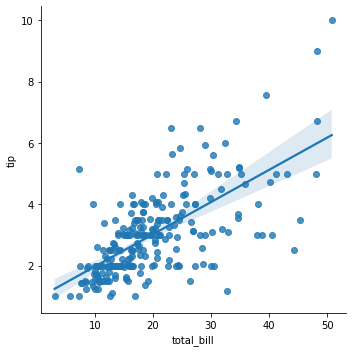

In [23]:
sns.lmplot(data=tips_ds, x="total_bill", y="tip")

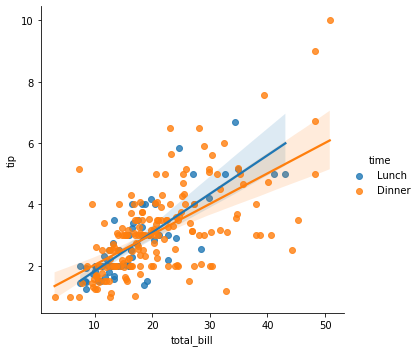

In [24]:
sns.lmplot(data=tips_ds, x="total_bill", y="tip", hue="time")

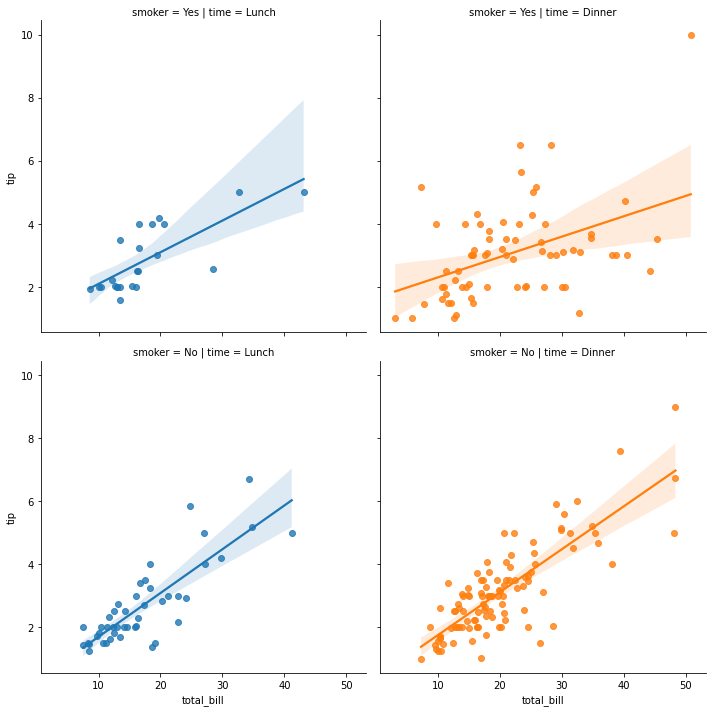

In [28]:
sns.lmplot(data=tips_ds, x="total_bill", y="tip", row="smoker", col="time", hue="time")

3.5、sns.jointplot()：绘制两个变量的联合分布和各自分布

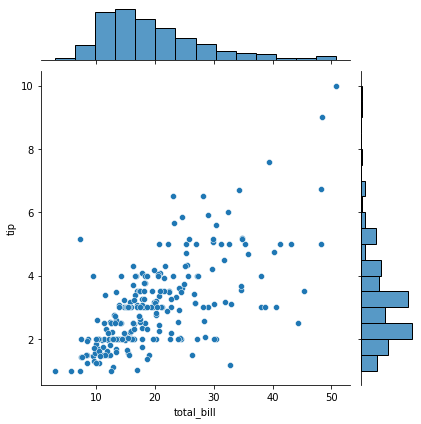

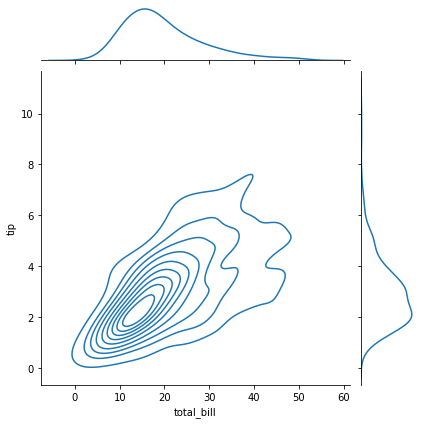

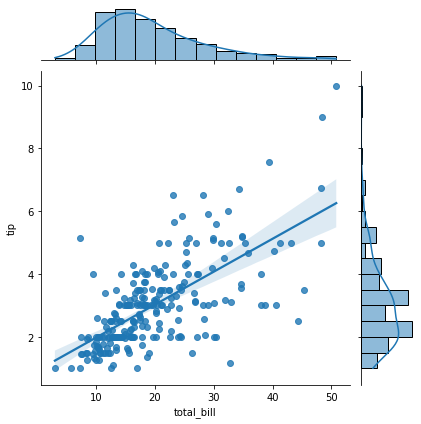

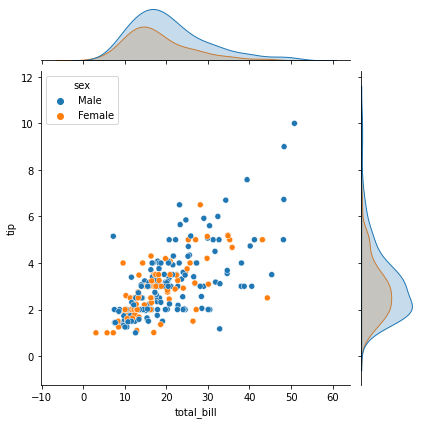

In [34]:
# kind:["scatter", "kde", "hist", "hex", "reg", "resid"]
sns.jointplot(data=tips_ds, x="total_bill", y="tip")
sns.jointplot(kind="kde", data=tips_ds, x="total_bill", y="tip")
sns.jointplot(kind="reg", data=tips_ds, x="total_bill", y="tip")
sns.jointplot(hue="sex", data=tips_ds, x="total_bill", y="tip")

3.6、jointplot的升级版：JointGrid，可通过g.plot()自定义函数

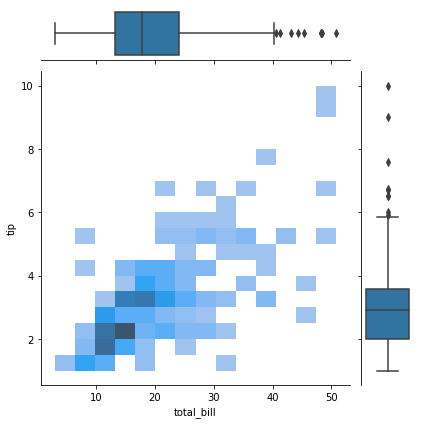

In [38]:
g=sns.JointGrid(data=tips_ds, x="total_bill", y="tip")
g.plot(
    #联合分布：直方图histplot
    sns.histplot,
    #边缘分布：箱式图boxplot
    sns.boxplot)

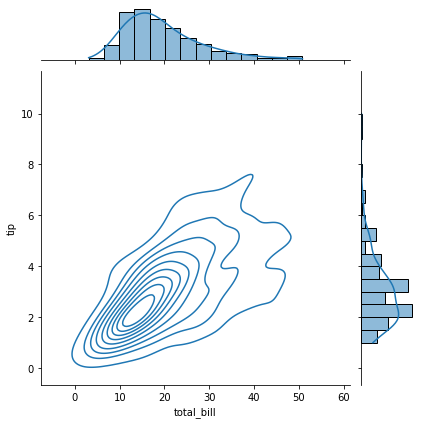

In [41]:
g=sns.JointGrid(data=tips_ds, x="total_bill", y="tip")
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot, kde=True)

## 4、Diamonds数据集
4.1、载入数据集

In [10]:
diamonds_ds = sns.load_dataset("diamonds")
diamonds_ds


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


4.2、sns.boxplot：查看数据集中数值的变量范围，是否有异常值

<AxesSubplot:xlabel='price'>

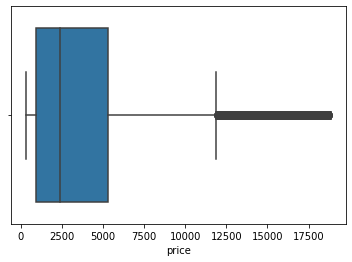

In [11]:
sns.boxplot(data=diamonds_ds, x="price")

4.3、sns.displot()查看变量的分布

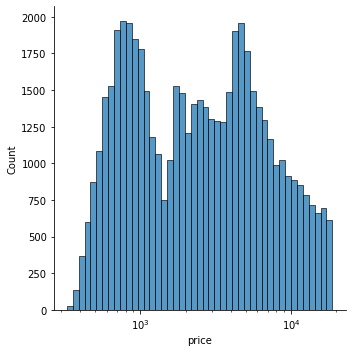

In [13]:
sns.displot(data=diamonds_ds, x="price", log_scale=True)